<a href="https://colab.research.google.com/github/K33ngston/pandas-w-python/blob/main/Copy_of_Untitled23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/10
100/100 [==============================] - 7s 56ms/step - loss: 1.0700 - accuracy: 0.6488 - val_loss: 0.2831 - val_accuracy: 0.9206
Epoch 2/10
100/100 [==============================] - 7s 70ms/step - loss: 0.3501 - accuracy: 0.8939 - val_loss: 0.1223 - val_accuracy: 0.9613
Epoch 3/10
100/100 [==============================] - 5s 53ms/step - loss: 0.2189 - accuracy: 0.9369 - val_loss: 0.0857 - val_accuracy: 0.9744
Epoch 4/10
100/100 [==============================] - 7s 72ms/step - loss: 0.1629 - accuracy: 0.9527 - val_loss: 0.0694 - val_accuracy: 0.9756
Epoch 5/10
100/100 [==============================] - 5s 50ms/step - loss: 0.1326 - accuracy: 0.9613 - val_loss: 0.0563 - val_accuracy: 0.9806
Epoch 6/10
100/100 [==============================] - 9s 88ms/step - loss: 0.1084 - accuracy: 0.9680 - val_loss: 0.0573 - val_accuracy: 0.9794
Epoch 7/10
100/100 [==============================] - 5s 53ms/step - loss: 0.0902 - accuracy: 0.9758 - val_loss: 0.0553 - val_accuracy: 0.9819

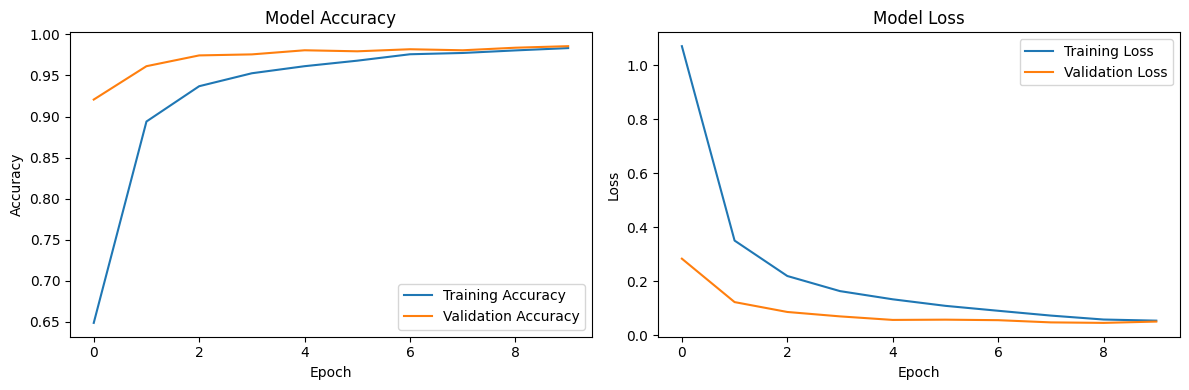

63/63 [==============================] - 1s 8ms/step


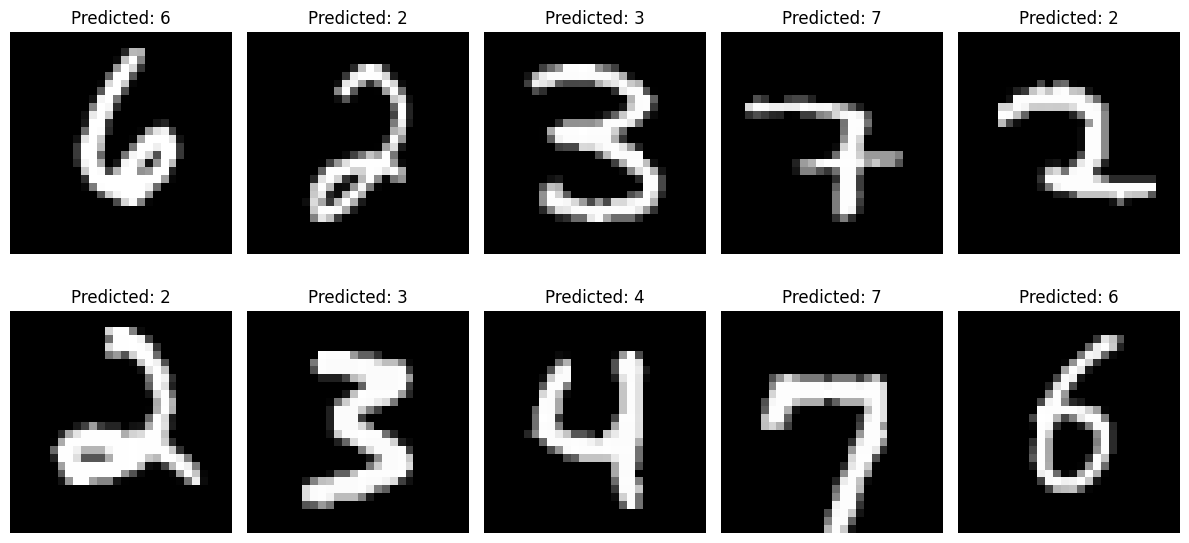

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.optimizers import Adam

# Load the MNIST dataset
data = pd.read_csv('/content/mnist_test.csv')

# Separate features and labels
X = data.drop('label', axis=1).values
y = data['label'].values

# Reshape the data to 28x28 images
X = X.reshape(-1, 28, 28, 1)

# Normalize the data
X = X / 255.0

# Convert labels to categorical
y = to_categorical(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.2, verbose=1)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test accuracy: {test_accuracy:.4f}")

# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Make predictions on test data
predictions = model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)

# Display some test images with their predicted labels
fig, axes = plt.subplots(2, 5, figsize=(12, 6))
for i, ax in enumerate(axes.flat):
    ax.imshow(X_test[i].reshape(28, 28), cmap='gray')
    ax.set_title(f"Predicted: {predicted_classes[i]}")
    ax.axis('off')

plt.tight_layout()
plt.show()